## 0. Library setting

In [1]:
import os
import numpy as np
import pandas as pd

import statsmodels.api as sm

import matplotlib.pyplot as plt

## 1. Check data

In [2]:
url = 'https://raw.githubusercontent.com/mtakahashi123/causality/main/data06.csv'

df = pd.read_csv(url)

In [3]:
df.head()

,country,y1,x1,x2
0,australia,3.871326,4.9,54.763
1,austria,15.658538,8.1,49.701
2,belgium,8.643573,5.6,46.198
3,brazil,0.000000,1.2,8.755
4,canada,4.173866,4.0,46.550


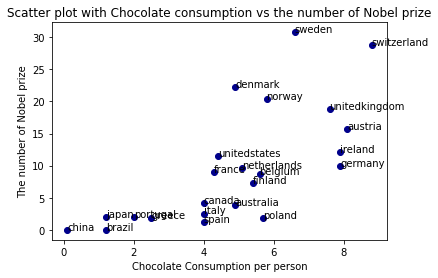

In [4]:
fig, ax = plt.subplots()
ax.scatter(x=df['x1'], y=df['y1'], c='DarkBlue')

ax.set_xlabel('Chocolate Consumption per person')
ax.set_ylabel('The number of Nobel prize')
ax.set_title('Scatter plot with Chocolate consumption vs the number of Nobel prize')

for id, row in df.iterrows():
    ax.annotate(row['country'], (row['x1'], row['y1']))

## 2.1. Relation between Chocolate consumption vs Nobel prize people

In [5]:
y = df['y1']
X = df['x1']
X = sm.add_constant(X)

model = sm.OLS(y, X)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     y1   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     20.42
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           0.000188
Time:                        22:03:27   Log-Likelihood:                -75.166
No. Observations:                  23   AIC:                             154.3
Df Residuals:                      21   BIC:                             156.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.4217      3.227     -1.060      0.3

In [6]:
print('Parameters: ', res.params)

Parameters:  const   -3.421651
x1       2.704428
dtype: float64


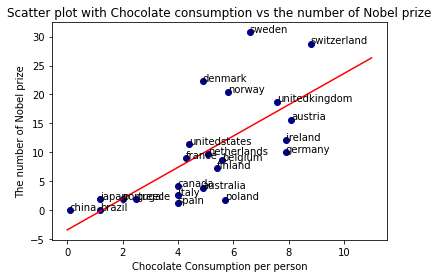

In [7]:
fig, ax = plt.subplots()
ax.scatter(x=df['x1'], y=df['y1'], c='DarkBlue')

ax.set_xlabel('Chocolate Consumption per person')
ax.set_ylabel('The number of Nobel prize')
ax.set_title('Scatter plot with Chocolate consumption vs the number of Nobel prize')

for id, row in df.iterrows():
    ax.annotate(row['country'], (row['x1'], row['y1']))
    
## Predict line
a = res.params['x1']
b = res.params['const']
x = np.arange(0, 12)
y = a * x + b

ax.plot(x, y, color='red')

## 2.2 Add "GDP" data(x2) as confounding for both chocolate consumption(x1) and Nobel prize people(y1)

In [8]:
y = df['y1']
X = df[['x1', 'x2']]
X = sm.add_constant(X)

model = sm.OLS(y, X)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     y1   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     14.90
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           0.000109
Time:                        22:03:27   Log-Likelihood:                -72.484
No. Observations:                  23   AIC:                             151.0
Df Residuals:                      20   BIC:                             154.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.3203      3.203     -1.973      0.0

In [9]:
print('Parameters: ', res.params)

Parameters:  const   -6.320348
x1       1.504773
x2       0.195517
dtype: float64


元々の`x1`の回帰係数`2.704`に比して、`GDP`を係数に加えたモデルでは同回帰係数が`1.505`なので、元の方は過大に見積もっていた。
また、同係数の信頼区間が`-0.073`から`3.082`で`0`を含んでおり、こちらの回帰係数が`0`であるという帰無仮説を棄却できない。